#### 載入 MNIST 資料集

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#### 畫出手寫數字圖片

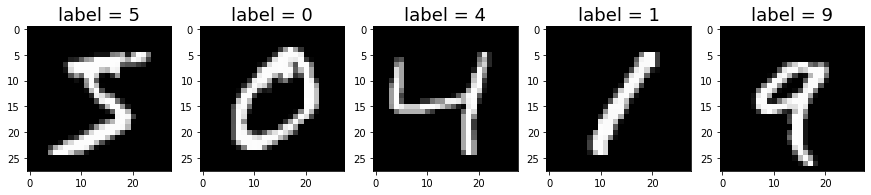

In [3]:
import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15, 4)  #←設定圖形的寬和高 (英吋)
for i in range(5):
    ax = plt.subplot(1, 5, 1+i)  #←設定 1x5 的子圖表, 目前要畫第 1+i 個
    ax.imshow(train_images[i], cmap= 'gray')   #←顯示灰階圖片(黑底白字)
    ax.set_title('label = '+str(train_labels[i]), fontsize=18)  #←設定標題
plt.show()  #將圖形顯示出來

#### 預處理訓練資料

In [4]:
x_train = train_images.reshape((60000, 28 * 28)) #←將 (60000,28,28) 轉換成 (60000,784)
x_train = x_train.astype('float32') / 255    #←再將 0~255 的像素值轉換成 0~1 的浮點數

x_test = test_images.reshape((10000, 28 * 28))  #}←將 10000 筆測試樣本做同樣的轉換
x_test = x_test.astype('float32') / 255         #}

#### 預處理標籤資料

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)  #←將標籤做 One-hot 編碼
y_test  = to_categorical(test_labels)  #←將測試做 One-hot 編碼

#### 建立多元分類模型

In [7]:
from tensorflow.keras.models import Sequential  #← 匯入 Keras 的序列式模型類別
from tensorflow.keras.layers import Dense       #← 匯入 Keras 的密集層類別

model = Sequential()                 #← 建立序列模型物件
model.add(Dense(512, activation='relu', input_dim= 784)) #← 加入第一層
model.add(Dense(10, activation='softmax'))               #← 加入第二層
model.compile(optimizer='rmsprop',             #← 指定優化器
              loss='categorical_crossentropy', #← 指定損失函數
              metrics=['acc'])                 #← 指定評量準則

#### 訓練模型

In [8]:
history = model.fit(x_train, y_train, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2588 - acc: 0.9247
Epoch 2/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.1057 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0690 - acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0504 - acc: 0.9844
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0378 - acc: 0.9887


#### 評估模型成效

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)   #←使用測試樣本及標籤來評估普適能力
print('對測試資料集的準確率：', test_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.0656 - acc: 0.9796
對測試資料集的準確率： 0.9796


#### 畫出測試圖片並標示預測結果與標準答案

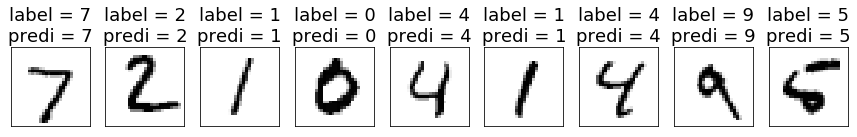

In [12]:
predict = model.predict_classes(x_test)  #←用測試樣本進行預測

plt.gcf().set_size_inches(15, 4)  #←設定圖形的尺吋
for i in range(9):
    ax = plt.subplot(1, 9, 1+i)   #←設定 1x5 的子圖表, 目前要畫第 1+i 個
    ax.imshow(test_images[i], cmap='binary')   #←顯示灰階圖片
    ax.set_title('label = '+str(test_labels[i]) +
                 '\npredi = '+str(predict[i]), fontsize=18) #←設定標題
    ax.set_xticks([]); ax.set_yticks([])       #←X, Y 軸不顯示刻度
plt.show()  #←將圖形顯示出來


#### 將模型存檔

In [13]:
model.save('MnistModel.h5')   #← 將模型以指定的檔名存檔